In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.applications.resnet50 import ResNet50
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'No of x_train sample: {x_train.shape[0]}')
print(f'No of y_train sample: {y_train.shape[0]}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
No of x_train sample: 50000
No of y_train sample: 50000


In [15]:
print(type(x_train)) 

<class 'numpy.ndarray'>


In [16]:
df = pd.DataFrame(y_train, columns=['classes'])
df.value_counts()

classes
0          5000
1          5000
2          5000
3          5000
4          5000
5          5000
6          5000
7          5000
8          5000
9          5000
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Samples per Class Distribution')

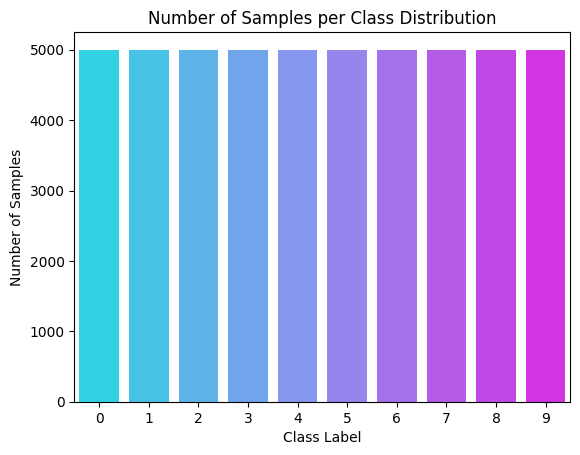

In [17]:
fig, axs = plt.subplots()
sns.countplot(x = 'classes', data = df, palette='cool')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class Distribution")

In [18]:
df = pd.DataFrame(y_test, columns=['classes'])
print(df.value_counts())

classes
0          1000
1          1000
2          1000
3          1000
4          1000
5          1000
6          1000
7          1000
8          1000
9          1000
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Samples per Class Distribution')

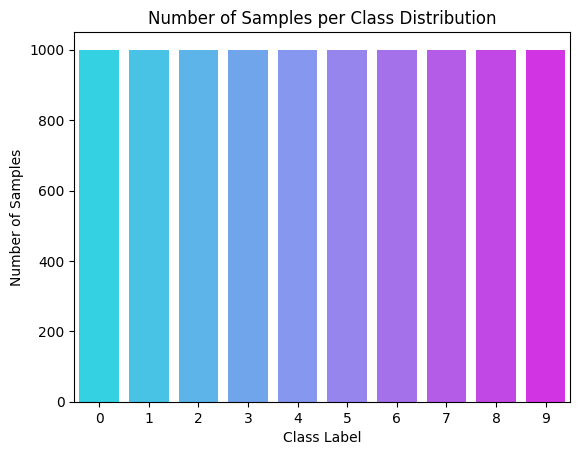

In [19]:
fig, axs = plt.subplots()
sns.countplot(x = 'classes', data = df, palette='cool')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class Distribution")

As we can see, each classe contain exacly 6000 examples( 5000 for training and 1000 for test).

The graph above shows us that data is balanced and for example if we had just 1000 samples of label 1 that will be a problem , the model will find difficulties to detect label 1"less accuracy ", so that's not going to happend everything look fine. It's important to know the distribution of dataset behind different classes because the goodness of our model depend on it.

Now let's doing some preprocessing.

The output variable have 10 posible values. This is a multiclass classification problem. We need to encode these lables to one hot vectors (ex : "bird" -> [0,0,1,0,0,0,0,0,0,0]).As we can see, each classe contain exacly 6000 examples( 5000 for training and 1000 for test).

# Normalizing
We have to normalize the data in order to reduce the pixel values. Currently, all the image pixels are in a range from 0–255, and we want the values in the range of 0 and 1. So we can either divide all the pixel values by 255.0 or use the ‘normalize’ command from keras library.

**key benefits of normalizing:**

1. Improved Model Convergence:
2. Fairer Treatment of Features:
3. Enhanced Interpretability:
4. Optimized Algorithm Performance:
5. Reduced Risk of Vanishing:

In [20]:
# before scaling
print(x_train[0].shape)
print(x_train[0])

(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
# after scaling
print(x_train[0].shape)

(32, 32, 3)


# Activation function
Befor using ANN first try to learn what is activation function
**Activation function**
The activation function can be defined as a mathematical function that introduces non-linearity to the neural network. This enables the models to learn complex patterns and helps them make accurate predictions.

In simple words, think of it like a switch, that decides whether a neuron should be activated or not. If the input is above a certain threshold or meets certain criteria, the neuron will activate/fire, or else it remains inactive.

for more better understanding please refer this article --link text
we have many activation function
1. Step Function:
2. Sigmoid Function: 
3. ReLU:

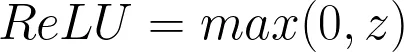

ReLU is majorly used in the hidden layers of the neural network since it brings sparsity to the data.
1. Non-linearity:
2. Computationally Efficient:
3. No Vanishing Gradient Problem:

# Transfer Learning

In [23]:
# parameter -1
# The ImageNet project is a large visual database designed for use in visual object recognition software research.
# More than 14 million images have been hand-annotated by the project to indicate what
# objects are pictured and in at least one million of the images, bounding boxes are also provided.

# parameter -2
# include_top = false means in imagenet we have thousand of class but need only 10, so we use own output layer
# in imagenet out class of image is also included.

#parameter -3
# input_shape the pixel of input image imagenet have image in that dimension on e.g (256,256,3)
# but our image dimension is (32,32,3).
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary() # this show the different layer the model have.

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

**Softmax** is one of the most popular activation functions used in multi-class classification problems. Softmax converts numbers into probabilistic distribution where each of the outputs represents a probability corresponding to a class.

# Medel

In [24]:
# Building our model

transfer_classifier= Sequential() # we will stack all our layer in model

# Since our image is of length and width(32,32) our resnet-50 could only take of (256,256)
# We need to upscale out image dimension, so we need to upscale three times each time it doubles it dimension

# first upscaling it will increase the dimension of image to (64,64)
transfer_classifier.add(UpSampling2D((2,2)))

# Second upscaling it will increase the dimension of image to (128,128)
transfer_classifier.add(UpSampling2D((2,2)))

# Third upscaling it will increase the dimension of image to (256,256)
transfer_classifier.add(UpSampling2D((2,2)))

# Then we need to add out upscaled image to the nodel
transfer_classifier.add(convolutional_base)

# Again we do flatten , which we have seen ealier
transfer_classifier.add(Flatten())

# we normalize the values on same scale in the end of each layer
transfer_classifier.add(BatchNormalization())

# 128 Hidden layer with activation relu
transfer_classifier.add(Dense(128, activation='relu'))

# To handle overfittng we use dropout, it applied to the hidden layers.
# For instance, if the hidden layers have 1000 neurons (nodes) and a dropout is
# applied with drop probability = 0.5, then 500 neurons would be randomly dropped in every iteration (batch)
transfer_classifier.add(Dropout(0.5))

# In the end of layer we normalize
transfer_classifier.add(BatchNormalization())
# Again we use hidden layer with 64 neurons
transfer_classifier.add(Dense(64, activation='relu'))
transfer_classifier.add(Dropout(0.5))
transfer_classifier.add(BatchNormalization())
# for output layer we use activation fn softmax
transfer_classifier.add(Dense(10, activation='softmax'))

# Optimization
The optimization algorithm is called “**gradient descent**“, where “gradient” refers to the calculation of an error gradient or **slope of error** and “descent” refers to the moving down along that **slope towards some minimum** level of error.

In [25]:

# RMSprop optimizer is better than adam
# The gist of RMSprop is to: Maintain a moving (discounted) average of
# the square of gradients. Divide the gradient by the root of this average.

# lr is learning rate it decides how much change in weight be there in one updation.
# all other parameter we have seen ealier
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
transfer_classifier.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Epoch
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
The number of epochs can be set to an integer value between **one and infinity**. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs just like here i have use fixed number of **epochs equeal to 50** as well as other stoping criteria that is **Early stopping**

# Batch
The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

**1<= batch size <= number of samples in the training dataset.**

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.

**Depending upon size of batch we divide it into 3 category**
1. **Batch Gradient Descent**. Batch Size = Size of Training Set
2. **Stochastic Gradient Descent**. Batch Size = 1
3. **Mini-Batch Gradient Descent**. 1 < Batch Size < Size of Training Set

In [26]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# training the neural network
# validation_split is Fraction of the training data to be used as validation data
# Epoch is the total number of iterations of the training data in one cycle
history = transfer_classifier.fit(x_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1715741500.410696     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 345s 201ms/step - acc: 0.5323 - loss: 1.4542 - val_acc: 0.8734 - val_loss: 0.4363
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 175ms/step - acc: 0.8458 - loss: 0.5871 - val_acc: 0.7978 - val_loss: 0.7439
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 175ms/step - acc: 0.9028 - loss: 0.3952 - val_acc: 0.9220 - val_loss: 0.2639
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 175ms/step - acc: 0.9282 - loss: 0.2950 - val_acc: 0.9118 - val_loss: 0.2937
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.9447 - loss: 0.2335 - val_acc: 0.8742 - val_loss: 0.7551
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.9583 - loss: 0.1773 - val_acc: 0.8082 - val_loss: 1.5034
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 175ms/step - acc: 0.9606 - loss: 0.1618 - val_acc: 0.9240 - val_loss: 0.2966
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 175ms/step - acc: 0.9676 - loss: 0.1422 - val_acc: 0.8986 - val_loss: 0.4394
Epoch 9/50
1407/140

We got accuracy of 97.89% with training dataset and 92.70 with validation dataset which is quit low.

add Codeadd Markdown
Now we can save our trained model, since it takes lots of resuources to train our model everytime so we can save and later we load and use it directly.

In [31]:
# evaluating loss and accuracy on test data
loss, accuracy = transfer_classifier.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - acc: 0.9308 - loss: 0.3152
Test Accuracy = 0.9275000095367432


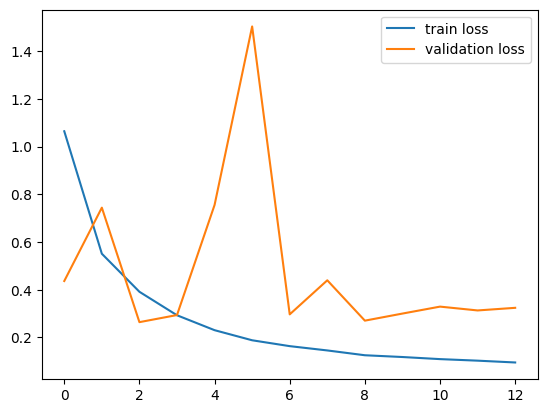

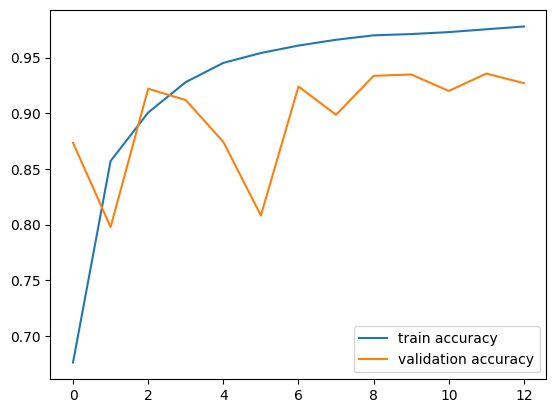

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()